In [50]:
from numpy.random import seed
seed(8)
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
from sklearn import datasets, model_selection 
%matplotlib inline

from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,BatchNormalization


In [51]:
def read_in_and_split_data(iris_data):
    data, target = iris_data['data'], iris_data['target']
    train_data, test_data, train_targets, test_targets = train_test_split(data, target, test_size=0.1)
    return train_data, test_data, train_targets, test_targets

In [52]:
# to generate the test and training data.
iris_data = datasets.load_iris()
train_data, test_data, train_targets, test_targets = read_in_and_split_data(iris_data)

In [53]:
# Convert targets to a one-hot encoding

train_targets = tf.keras.utils.to_categorical(np.array(train_targets))
test_targets = tf.keras.utils.to_categorical(np.array(test_targets))

In [54]:
def get_model(input_shape):

    model = Sequential([
        Dense(64, activation='relu', kernel_initializer=tf.initializers.he_normal(), 
              bias_initializer=tf.initializers.Constant(1.0), input_shape=(input_shape)),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(128, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(64, activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model

In [55]:
# get model

model = get_model(train_data[0].shape)

In [56]:
def compile_model(model):
    
    model.compile(optimizer=tf.keras.optimizers.Adam(0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [57]:
compile_model(model)

In [58]:
def train_model(model, train_data, train_targets, epochs):
    
    history = model.fit(train_data, train_targets, epochs=epochs, batch_size=40, validation_split=0.15, verbose=False)
    
    return history

In [59]:
# train model
history = train_model(model, train_data, train_targets, epochs=500)

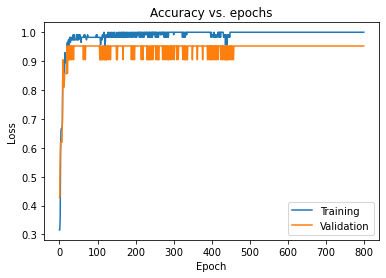

In [60]:
# plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

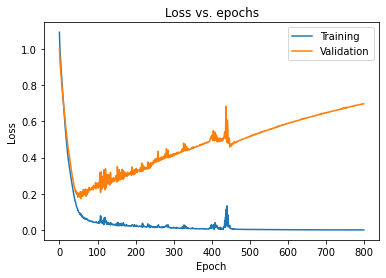

In [61]:
# plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [62]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), kernel_initializer=tf.initializers.he_normal(), 
              bias_initializer=tf.initializers.Constant(1.0), input_shape=(input_shape)),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dropout(dropout_rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        BatchNormalization(),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dropout(dropout_rate),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model
    
    

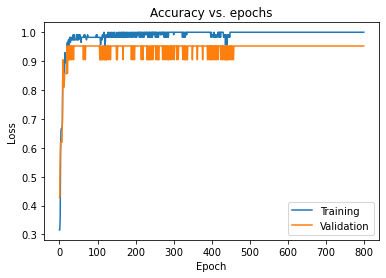

In [63]:
# plot the epoch vs accuracy graph

try:
    plt.plot(history.history['accuracy'])
    plt.plot(history.history['val_accuracy'])
except KeyError:
    plt.plot(history.history['acc'])
    plt.plot(history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

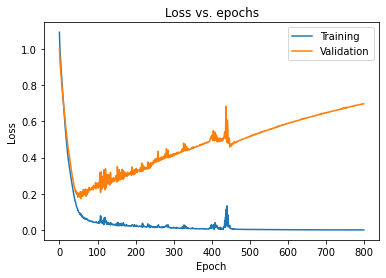

In [64]:
# plot the epoch vs loss graph
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [65]:
def get_regularised_model(input_shape, dropout_rate, weight_decay):
    model = Sequential([
        Dense(64, activation='relu', kernel_regularizer = tf.keras.regularizers.l2(weight_decay), kernel_initializer=tf.initializers.he_normal(), 
              bias_initializer=tf.initializers.Constant(1.0), input_shape=(input_shape)),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dropout(dropout_rate),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dense(128, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        BatchNormalization(),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dropout(dropout_rate),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dense(64, kernel_regularizer = tf.keras.regularizers.l2(weight_decay), activation='relu'),
        Dense(3, activation='softmax'),
    ])
    return model
    
    

In [66]:
# Instantiate the model, using a dropout rate of 0.3 and weight decay coefficient of 0.001

reg_model = get_regularised_model(train_data[0].shape, 0.3, 0.001)

In [67]:
# Compile the model

compile_model(reg_model)

In [68]:
# Train the model

reg_history = train_model(reg_model, train_data, train_targets, epochs=800)

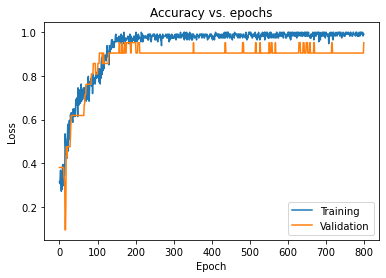

In [69]:
# plot the new accuracy vs epoch graph

try:
    plt.plot(reg_history.history['accuracy'])
    plt.plot(reg_history.history['val_accuracy'])
except KeyError:
    plt.plot(reg_history.history['acc'])
    plt.plot(reg_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

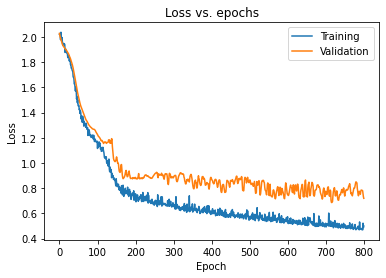

In [70]:
# plot the new loss vs epoch graph

plt.plot(reg_history.history['loss'])
plt.plot(reg_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [71]:
def get_callbacks():
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss', patience=30, min_delta=0.01, mode='min')
    learning_rate_reduction = tf.keras.callbacks.ReduceLROnPlateau(monitor="val_loss",factor=0.2, patience=20, verbose=1)
    
    return early_stopping, learning_rate_reduction
    

In [72]:
call_model = get_regularised_model(train_data[0].shape, 0.3, 0.0001)
compile_model(call_model)
early_stopping, learning_rate_reduction = get_callbacks()
call_history = call_model.fit(train_data, train_targets, epochs=800, validation_split=0.15,
                         callbacks=[early_stopping, learning_rate_reduction], verbose=0)


Epoch 00140: ReduceLROnPlateau reducing learning rate to 1.9999999494757503e-05.


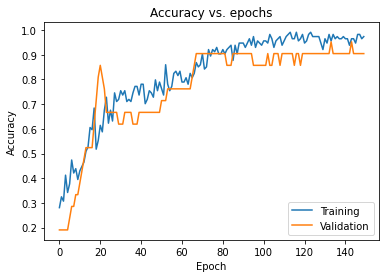

In [73]:
try:
    plt.plot(call_history.history['accuracy'])
    plt.plot(call_history.history['val_accuracy'])
except KeyError:
    plt.plot(call_history.history['acc'])
    plt.plot(call_history.history['val_acc'])
plt.title('Accuracy vs. epochs')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='lower right')
plt.show() 

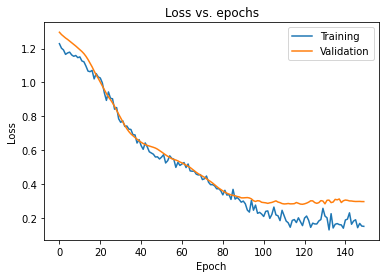

In [74]:
plt.plot(call_history.history['loss'])
plt.plot(call_history.history['val_loss'])
plt.title('Loss vs. epochs')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Training', 'Validation'], loc='upper right')
plt.show() 

In [75]:
# Evaluate the model on the test set

test_loss, test_acc = call_model.evaluate(test_data, test_targets, verbose=0)
print("Test loss: {:.3f}\nTest accuracy: {:.2f}%".format(test_loss, 100 * test_acc))

Test loss: 0.097
Test accuracy: 100.00%
